<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker with questions by Eefje Benschop*

## Notebook 4: Functions
In this Notebook we learn how to write our own functions, but we start out with a bit about Python packages.

### A bit about packages
A package is a set of Python functions. When we want to use a function from a package, we need to import it. There are many different ways to import packages. The most basic syntax is

`import numpy`

after which any function in `numpy` can be called as `numpy.function()`. If you don't like the name of the package, for example because it is long, you can change the name. The `numpy` package is renamed to `np` by typing

`import numpy as np`

after which all functions in `numpy` can be called as `np.function()`. 

Packages can also have subpackages. For example, the `numpy` package has a subpackage called `random`, which has a bunch of functions to deal with random variables. If the `numpy` package is imported with `import numpy as np`, functions in the `random` subpackage can be called as `np.random.function()`. 

If you only need one specific function, you don't have to import the entire package. For example, if you only want the cosine function of the numpy package, you may import it as `from numpy import cos`, after which you can simply call the cosine function as `cos()`. You can even rename functions when you import them. For example, after `from numpy import cos as newname`, you can call the function `newname()` to compute the cosine (I know, pretty silly, but this can become handy). 

In the previous Notebooks we always imported `numpy` and called it `np` and we imported the `matplotlib.pyplot` and called it `plt`. Both are standard names in the Python community. The statement we added before importing `matplotlib` is `%matplotlib inline`. This latter command is an IPython command and not a Python command. It will only work in IPython and is called a magic command. All magic commands are preceded with a `%`. The statement `%matplotlib inline` puts all figures in the Notebook rather than in a separate window. 

Enough about packages for now. Let's start the way we always start.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Functions
Functions are an essential part of a programming language.
You already used many functions like `plot`, `loadtxt`, and `linspace`.
But you can also define your own functions.
To define a new function, use the `def` command. After `def` follows the name of the function and then between parentheses the arguments of the function and finally a colon. After the colon you indent until you are done with the function. The last line of the function should be `return` followed by what you want to return. For example, consider the following function of $x$:

$f(x)= \cos(x) \qquad x <0$

$f(x) = \exp(-x) \qquad x \ge 0$

Let's implement $f(x)$ in a function called `func`. There is one input argument: $x$. 

In [2]:
def func(x):
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

print(func(3))

0.049787068367863944


Once you define a function in Python, you can call it whenever you want during the session. So we can call it again

In [3]:
print(func(-2))

-0.4161468365471424


If you type

`func(` and then hit [shift-tab]

and wait a split second, the input arguments of the function pop-up in a little window, just like for other functions we already used. You can also provide additional documentation of your function. Put the documentation at the top of the indented block and put it between triple double quotes (`"""`). Run the code below to define the function `func` with the additional documentation, then in the code cell below type 

`func(` 

and hit [shift][tab] to see the additional documentation. Warning: don't leave a code cell with just `func(` or `func()` as you will get an error on [Kernel][Restart & Run All Cells].

In [4]:
def func(x):
    """First Python function
    written by Student X"""
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

The names of the arguments of a function are the names used inside the function. They have no relationship to the names used outside the function. When using a variable as the argument of a function, only the *value* gets passed to the function. In the example below, the *value* of `y` is passed as the first argument of the function `func`. Inside the function, this value is used for the variable `x`.

In [5]:
y = 2
print('func(2):', func(y))

func(2): 0.1353352832366127


### Exercise 1. <a name="back1"></a>First function
Write a Python function for the following function:

$f(x)=e^{-x/\alpha}\sin(x)$

The function should take `x` and `alpha` as input arguments and return the function value. Give your function a unique name (if you also call it `func` it will overwrite the `func` function that we defined above). Make a plot of $f(x)$ vs. $x$ for $x$ going from 0 to $10\pi$ using two different values of $\alpha$: 10 and 20. Add a legend and label the axes.

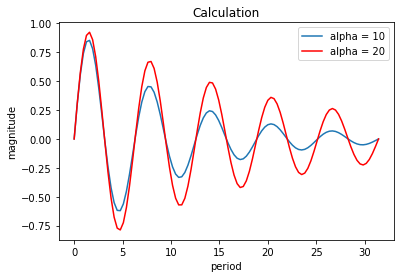

In [6]:
def exsin (x, a):
    return np.exp(-x / a) * np.sin(x)
ff = np.linspace(0, 10 * np.pi, 100)
plt.plot(ff, exsin(ff, 10), label = "alpha = 10")
plt.plot(ff, exsin(ff, 20), "r", label = "alpha = 20")
plt.xlabel("period")
plt.ylabel("magnitude")
plt.title("Calculation")
plt.legend()    

### Keyword arguments
Functions may have multiple input arguments followed by keyword arguments. Arguments *must* be entered and must be entered in the order defined. Keyword arguments don't need to be entered. When they are not entered, the default value is used. Keyword arguments may be given in any order as long as they come after the regular arguments. If you specify the keyword arguments in the order they are defined in the argument list, you don't even need to preceed them with the keyword, but it is saver to write the keywords out and it makes your code easier to read. For example, the function $f(x)=A\cos(\pi x+\theta)$ can be written with keyword arguments for $A$ and $\theta$ as follows.

In [7]:
def testfunc(x, A=1, theta=0):
    return A * np.cos(np.pi * x + theta)

print(testfunc(1))  # Uses default A=1, theta=0: cos(pi)
print(testfunc(1, A=2))  # Now A=2, and theta is still 0: 2*cos(pi)
print(testfunc(1, A=2, theta=np.pi / 4))  # Now A=2, theta=pi/4: 2*cos(5pi/4)
print(testfunc(1, theta=np.pi / 4, A=2))  # Same as above: 2*cos(5pi/4)
print(testfunc(1, theta=np.pi / 4))  # Now theta=pi/4, and A is still 1: cos(5pi/4)

-1.0
-2.0
-1.4142135623730954
-1.4142135623730954
-0.7071067811865477


Note that the proper style was applied, as defined in Notebook 1: there are spaces around mathematical symbols, but not around the equal sign of the keyword argument. 

### Local variables
Variables declared inside a function can only be used inside that function. The outside of a function doesn't know about the variables used inside the function, except for the variables that are returned by the function. In the code below, remove the `#` before `print(a)` and you will get an error message, as `a` is a local variable inside the function `localtest` (then put the `#` back, else you get an error when running [Kernel][Restart & Run All Cells]).

In [8]:
def localtest(x):
    a = 3
    b = 5
    return a * x + b
print(localtest(4))
#print(a)  # Will cause an error, as 'a' is not known outside function 

17


### Three types of variables inside a function
There are actually three types of variables inside a function. We already learned about two of them: variables passed to the function through the argument list, like `x` in the function above, and local variables, like `a` and `b` in the function above. The third type are variables defined outside the function but not passed to the function through the argument list. When a variable is used inside a Python function, Python first checks whether the variable has been defined locally. If not, it checks whether the variable is passed to the function through the argument list. And if that is not the case, Python checks whether the variable is defined outside the function, from the place the function was called. If that is not the case either, it will throw an error message. It is considered good coding practice to pass variables to a function when they are needed inside a function, rather than counting on Python to *find* the variable outside the function; it will likely lead to fewer coding errors as well.

Note that when a variable is defined locally, Python will not check whether that variable is also declared outside the function. It will happily create a new variable with the same name inside the function. It is important to realize the difference between these different types, so let's do a few examples.

In [9]:
# This function works properly
def test1(x):
    a = 3
    b = 5
    return a * x + b

print(test1(4))

# This function also works, but it is sloppy coding
# since variable a is defined outside the function
a = 3

def test2(x):
    b = 5
    return a * x + b

print(test2(4))  

17
17


In the following function, we define variable `var1` outside the function `test3`. The function `test3` doesn't take any input arguments (but it still needs the parentheses, else Python doesn't know it is a function!), and it creates a local variable `var1`. This local `var1` variable is only known inside the function `test3` and doesn't effect the value of `var1` outside function `test3`.

In [10]:
var1 = 8

def test3():
    var1 = 4
    print('Inside the function test3, var1 equals:', var1)
    
test3()
print('Value of var1 outside test3:', var1)

Inside the function test3, var1 equals: 4
Value of var1 outside test3: 8


.### Functions are building blocks that need to be tested separately
Functions are the building blocks of a computer code. They represent a well-defined functionality, which means they can *and should* be tested separately. So make it a habit to test whether your function does what you intended it to do. Sometimes it is easy to test a function: you can compare the value to a hand-calculation, for example. Other times it is more difficult, and you need to write some additional code to test the function. It is always worthwhile to do that. If you test your functions well, it will aid you in debugging your code, because you know that the error is not inside the function.

### Exercise 2, Fourier series
The standard square wave is a periodic wave in which the amplitude alternates between the values $-1$ and $+1$ on the interval $(-\pi, \pi]$ (see figure below).

<img src="square_wave.jpg">

This function can be described by a Fourier series:

$$s(x) =\sum\limits_{n=1}^\infty \frac{4}{\pi} \frac{1}{2n - 1}\sin\big((2n-1)\ x\big)$$

Write a Python function that takes as input argument $x$ (which may be an array) and as keyword argument the number of terms $N$, which means the summation is from $n=1$ to $n=N$) and returns $s(x)$. Inside your function, you need to use a loop. Use your function to compute the Fourier approximation of the square wave function for $x$ ranging from $-\pi$ to $3\pi$ and $N=5$. Plot your results.

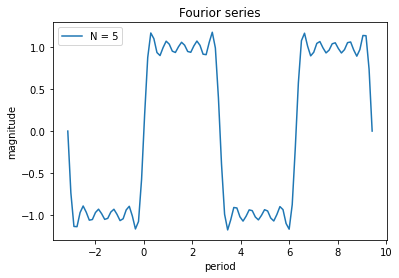

In [11]:
def fourior(x, N = 5):
    summation = np.zeros(len(x))
    for n in range(1, N + 1):
        summation += 4 * np.sin((2 * n - 1) * x) / (np.pi * (2 * n - 1))
    return summation
ra = np.linspace(-np.pi, 3 * np.pi, 100)
plt.plot(ra, fourior(ra), label = "N = 5")
plt.xlabel("period")
plt.ylabel("magnitude")
plt.title("Fourior series")
plt.legend()
        

### Exercise 3, Fourier series continued
Write a loop that calls the function you wrote in Exercise 2 for $N=2, 5$, and $15$. 
Your code should start with

`for N in [2, 5, 15]:`

Add a legend and label the axes. You must supply the `label` in the plotting statement, so that you can add the legend by simply typing `plt.legend()`.

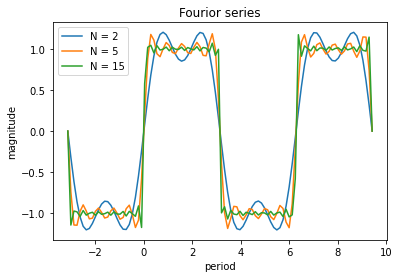

In [12]:
ra = np.linspace(-np.pi, 3 * np.pi, 100)
for N in [2, 5, 15]:
     plt.plot(ra, fourior(ra, N), label = f"N = {N}")
plt.xlabel("period")
plt.ylabel("magnitude")
plt.title("Fourior series")
plt.legend()

### Vectorization of a function
Not all functions can be called with an array of values as input argument. For example, the function `func` defined at the beginning of this notebook doesn't work with an array of `x` values. Remove the `#` and try it out. Then put the `#` back

In [13]:
def func(x):
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

x = np.linspace(-6, 6, 100)
#y = func(x) # Run this line after removing the # to see the error that occurs. Then put the # back

The reason this doesn't work is that Python doesn't know what to do with the line 

`if x < 0` 

when `x` contains many values. Hence the error message 

`The truth value of an array with more than one element is ambiguous` 

For some values of `x` the `if` statement may be `True`, for others it may be `False`. A simple way around this problem is to vectorize the function. That means we create a new function, let's call it `funcvec`, that is a vectorized form of `func` and can be called with an array as an argument. This is by far the easiest but not necessarily the computationally fastest way to make sure a function can be called with an array as an argument, and, unfortunately, it won't work for all situations. 

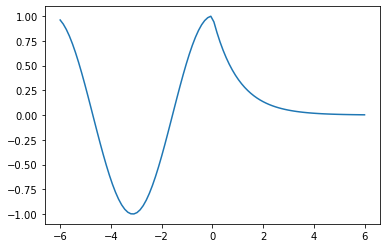

In [14]:
funcvec = np.vectorize(func)
x = np.linspace(-6, 6, 100)
y = funcvec(x)
plt.plot(x, y);

Back now to the problem of flow around a clinder. Contours of the stream function represent stream lines around the cylinder. To make a contour plot, the function to be contoured needs to be evaluated on a grid of points. The grid of points and an array with the values of the stream function at these points can be passed to a contouring routine to create a contour plot. To create a grid of points, use the function `meshgrid` which takes as input an array of `x` values and an array of `y` values, and returns a grid of `x` values and a grid of `y` values. For example, to have 5 points in the $x$-direction from -1 to +1, and 3 points in y-direction from 0 to 10:

In [15]:
x,y = np.meshgrid(np.linspace(-1, 1, 5), np.linspace(0, 10, 3)) 
print('x values')
print(x)
print('y values')
print(y)

x values
[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]
y values
[[ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10.]]


### Exercise 4, Mario 
Consider the screenshot of a Mario game shown below. You want to describe his jump with the function `h(x)`, which consists of four parts

$h(x) = \begin{cases}
  \ {x+3}  &  0\le x< b_1, \\
  \ 9-x & b_1 \le x<b_2\\
  \ -4x^2 +39x-87  & b_2\le x< b_3\\
  \ -x^2 +16x-57  & b_3\le x \le b_4\\
\end{cases}$

Write a function that returns the height of the jump $h(x)$. This function takes as input $x$ and the locations of the four boundaries $b_1$, $b_2$, $b_3$, $b_4$. 

Compute and plot the jump for $x$ going from $x=0$ to $x=9$ and $b_1=3$, $b_2=4$, $b_3=6$, and $b_4=9$. 
Write your code in the cell below, below the four lines of code that are already there. The four lines read an image, plot it to the screen, and set the scale. When you plot your jump, it will appear on the same figure. 

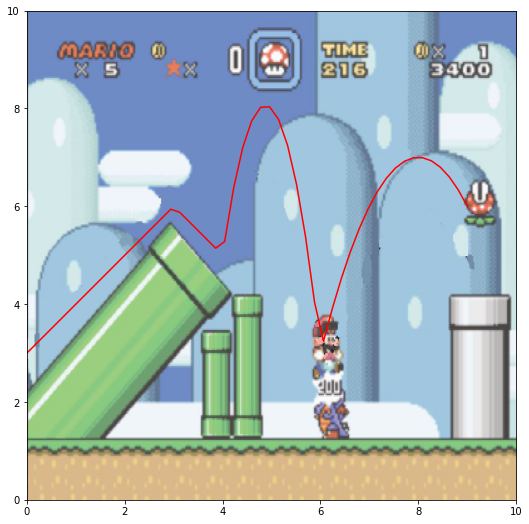

In [16]:
import matplotlib.image as mpimg
plt.figure(figsize=(9, 9))
img = mpimg.imread('mario.jpg')
plt.imshow(img, extent=[0, 10, 0, 10])
# LEAVE THE FOUR LINES ABOVE AND WRITE YOUR CODE BELOW
def jump(x, b1, b2, b3, b4):
    if x < b1:
        x += 3
    elif x < b2:
        x = 9 - x
    elif x < b3:
        x = -4 * x ** 2 + 39 * x - 87
    elif x <= b4:
        x = -x ** 2 + 16 * x -57
    return x
sp = np.linspace(0, 9, 50)
jumpvec = np.vectorize(jump)
plt.plot(sp, jumpvec(sp,3, 4, 6, 9), "r")

### Return multiple *things*
An assignment can assign values to multiple variables in one statement, for example

In [17]:
a, b = 4, 3
print('a:', a)
print('b:', b)

a, b, c = 27, np.arange(4), 'hello'
print('a:', a)
print('b:', b)
print('c:', c)

d, e, f = np.arange(0, 11, 5)
print('d:', d)
print('e:', e)
print('f:', f)

a: 4
b: 3
a: 27
b: [0 1 2 3]
c: hello
d: 0
e: 5
f: 10


Similarly, a function may return one value or one array. Or a function may return multiple values, multiple arrays, or whatever the programmer decides to return (including nothing, of course). When multiple *things* are returned, they are returned as a tuple. They can be stored as a tuple, or, if the user knows how many *things* are returned, they can be stored in individual variables right away, as in the example below.

In [18]:
def newfunc():
    dump = 4 * np.ones(5)
    dump[0] = 100
    return 33, dump, 'this works great!'

test = newfunc()
print(type(test))
print(test[1]) 

a, b, c = newfunc()
print('a:', a)
print('b:', b)
print('c:', c)

<class 'tuple'>
[100.   4.   4.   4.   4.]
a: 33
b: [100.   4.   4.   4.   4.]
c: this works great!


### Using a function as the argument of another function
So far, we have used single values or arrays as input arguments of functions. But we can also use a function as one of the input arguments of another function. Consider, for example, a function called `takesquare` that takes two input arguments: a function `finput` and a value `x`, and it returns the function `finput` evaluated at `x` and then squared.

In [19]:
def takesquare(finput, x):
    return finput(x) ** 2

We can now call `takesquare` with any function $f$ that can be called as $f(x)$ and returns one value. For example, we can call it with the cosine function, and we can test right away whether we got the right answer

In [20]:
print('takesquare result:', takesquare(np.cos, 2))
print('correct value is: ', np.cos(2) ** 2)

takesquare result: 0.17317818956819406
correct value is:  0.17317818956819406


### Exercise 5. Numerical integration

Numerical integration of a function is a common engineering task. 
The `scipy` package has a specific subpackage called `integrate` with a number of numerical integration functions. We will use the `quad` function. Use the `quad` function to integrate the function $f(x)=\text{e}^{-2x}$ from 2 till 6. Note that `quad` returns multiple things (read the documentation). Only report the value of the integral using exponential notation and 4 significant digits (using f-strings, of course). Check that you did it right by doing the integration by hand (which is easy for this function). 

Next, compute the following integral:

$$\int_2^6 \frac{\text{e}^{-2x}}{x}\text{d}x$$ 

This integral is more difficult to do analytically. Perform the integration numerically with the `quad` function and print your answer to the screen using exponential notation and 4 significant digits. Check your answer, for example, at the [wolframalpha website](https://www.wolframalpha.com) where you can simply type: `integrate exp(-2x)/x from 2 to 6`.

In [21]:
from scipy.integrate import quad
def integration_1 (x):
    return np.exp(-2 * x)
def integration_2 (x):
    return np.exp(-2 * x) / x
a, e = quad(integration_1, 2, 6)
b, e = quad(integration_2, 2, 6)
print(f"The answer for e^(-2*x) is {a:.4e} and the answer for e^(-2*x)/x is {b:.4e}")

The answer for e^(-2*x) is 9.1547e-03 and the answer for e^(-2*x)/x is 3.7789e-03


### Exercise <a name="back6"></a>6. Use good style

Review all your answers making sure that you are using good programming style as explained in Notebook 1. You will have to use good style to obtain a passing grade.